# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# Rename all the columns to lower case
# Assuming you have a DataFrame called df
df.columns = df.columns.str.lower()
# Print the updated columns to verify
print(df.columns)


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')


In [5]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [6]:
# Change the index to 'linename'
df = df.set_index('linename')
# Verify the index change
print(df.index)


Index(['NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       'NQR456W', 'NQR456W', 'NQR456W', 'NQR456W',
       ...
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],
      dtype='object', name='linename', length=197625)


Reset the index: 

In [7]:
# Reset the index
df = df.reset_index()
# Verify the index has been reset
print(df.index)


RangeIndex(start=0, stop=197625, step=1)


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [8]:
# Add a new 'num_lines' column
# Count how many lines pass through each station
num_lines = df.groupby('station')['linename'].nunique().reset_index(name='Num_Lines')

# Merge the 'Num_Lines' count back into the original DataFrame
df = df.merge(num_lines, on='station', how='left')

# Sort the DataFrame by the 'Num_Lines' column in descending order
df = df.sort_values(by='Num_Lines', ascending=False)

# Verify the changes
print(df[['station', 'Num_Lines']].head())  # Display the 'station' and 'Num_Lines' columns


      station  Num_Lines
44653  125 ST          4
4505    23 ST          4
4477    23 ST          4
4476    23 ST          4
4475    23 ST          4


Write a function to clean column names: 

In [9]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [ ]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = None
    return cleaned

In [10]:
def clean_column_names(df):
    # Convert all column names to lowercase
    df.columns = df.columns.str.lower()
    
    # Remove leading and trailing spaces and replace spaces with underscores
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    
    # Replace any non-alphanumeric characters (except underscores) with underscores
    df.columns = df.columns.str.replace(r'[^a-z0-9_]', '_', regex=True)
    
    # Optionally, remove multiple underscores
    df.columns = df.columns.str.replace('__', '_', regex=True)
    
    return df

# Example usage
# Assuming 'df' is your DataFrame
df = clean_column_names(df)

# Verify the cleaned column names
print(df.columns)


Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')


In [11]:
# Use the above function to clean the column names
# Assuming 'df' is your DataFrame
def clean_column_names(df):
    # Convert all column names to lowercase
    df.columns = df.columns.str.lower()
    
    # Remove leading and trailing spaces and replace spaces with underscores
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    
    # Replace any non-alphanumeric characters (except underscores) with underscores
    df.columns = df.columns.str.replace(r'[^a-z0-9_]', '_', regex=True)
    
    # Optionally, remove multiple underscores
    df.columns = df.columns.str.replace('__', '_', regex=True)
    
    return df

# Apply the function to clean the column names
df = clean_column_names(df)

# Verify the cleaned column names
print(df.columns)


Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')


In [12]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [13]:
# Convert the data type of the 'date' column to a date


# Add a new column 'day_of_week' that represents the day of the week 
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'errors="coerce"' will turn invalid parsing to NaT

# Add a new column 'day_of_week' that represents the day of the week
# This will return the weekday (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df['date'].dt.day_name()

# Verify the changes
print(df[['date', 'day_of_week']].head())


            date day_of_week
44653 2018-08-26      Sunday
4505  2018-08-28     Tuesday
4477  2018-08-30    Thursday
4476  2018-08-30    Thursday
4475  2018-08-30    Thursday


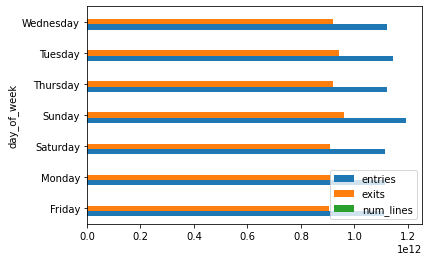

In [14]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [15]:
# Reset the index of grouped
grouped = None
# Print the first five rows of grouped
# Assuming 'df' is your DataFrame, and we're grouping by a column, say 'station'
grouped = df.groupby('station').agg({'entries': 'sum', 'exits': 'sum'})  # Example aggregation

# Reset the index of the grouped DataFrame
grouped = grouped.reset_index()

# Print the first five rows of the grouped DataFrame
print(grouped.head())



         station       entries         exits
0           1 AV  127637422994   68336694378
1         103 ST    6809043268   26408857862
2  103 ST-CORONA    2936772648    3007136644
3         104 ST  201698739525  146808927663
4         110 ST    1485948761    1430806219


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [16]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

KeyError: 'day_of_week'

In [17]:
# Define the dictionary for mapping days of the week to whether it's a weekend or not
weekend_map = {
    'Monday': False,
    'Tuesday': False,
    'Wednesday': False,
    'Thursday': False,
    'Friday': False,
    'Saturday': True,
    'Sunday': True
}

# Add the 'is_weekend' column using the 'map' function on 'day_of_week'
df['is_weekend'] = df['day_of_week'].map(weekend_map)

# Verify the changes
print(df[['day_of_week', 'is_weekend']].head())


      day_of_week  is_weekend
44653      Sunday        True
4505      Tuesday       False
4477     Thursday       False
4476     Thursday       False
4475     Thursday       False


In [18]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

KeyError: 'is_weekend'

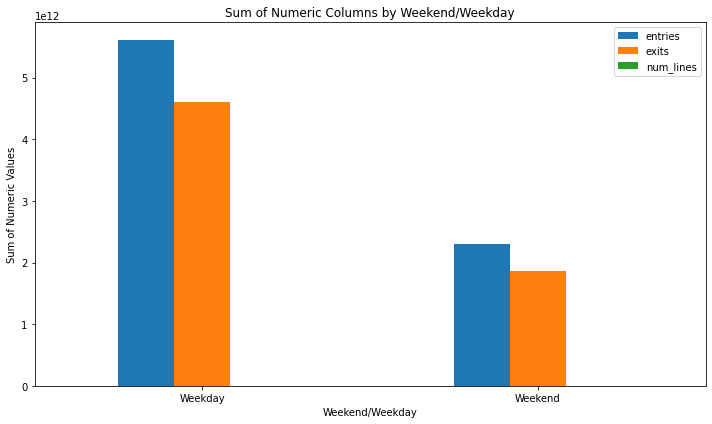

In [19]:
import matplotlib.pyplot as plt

# Group by the 'is_weekend' column and sum the numeric columns
grouped_by_weekend = df.groupby('is_weekend').sum()

# Plot the results
grouped_by_weekend.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Sum of Numeric Columns by Weekend/Weekday')
plt.xlabel('Weekend/Weekday')
plt.ylabel('Sum of Numeric Values')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

In [24]:
# Check the column names to ensure that 'c/a' and 'scp' exist
print(df.columns)

# Drop the 'c/a' and 'scp' columns if they exist
columns_to_drop = ['c/a', 'scp']

# Use .drop() safely, checking if columns exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verify the columns after dropping
print(df.columns)


Index(['linename', 'c_a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week', 'is_weekend'],
      dtype='object')
Index(['linename', 'c_a', 'unit', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week', 'is_weekend'],
      dtype='object')


In [28]:
# Drop the 'c_a' and 'scp' columns
df = df.drop(columns=['c_a', 'scp'], errors='ignore')

# Verify the columns after dropping
print(df.columns)


Index(['linename', 'unit', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'num_lines', 'day_of_week', 'is_weekend'],
      dtype='object')


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
#weekend seems like outliers

## Summary

You practiced your data cleanup skills using Pandas.